<a href="https://colab.research.google.com/github/Codedestructor56/Bacteria-detection/blob/master/Count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
!pip install ultralytics

In [43]:
import os
import numpy as np
import ultralytics

In [44]:
if os.path.exists("drive/MyDrive/best.pt"):
  model_path="drive/MyDrive/best.pt"

In [101]:
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')


Saving WhatsApp Image 2023-09-18 at 15.33.53.jpeg to WhatsApp Image 2023-09-18 at 15.33.53 (1).jpeg
Uploaded file: WhatsApp Image 2023-09-18 at 15.33.53 (1).jpeg


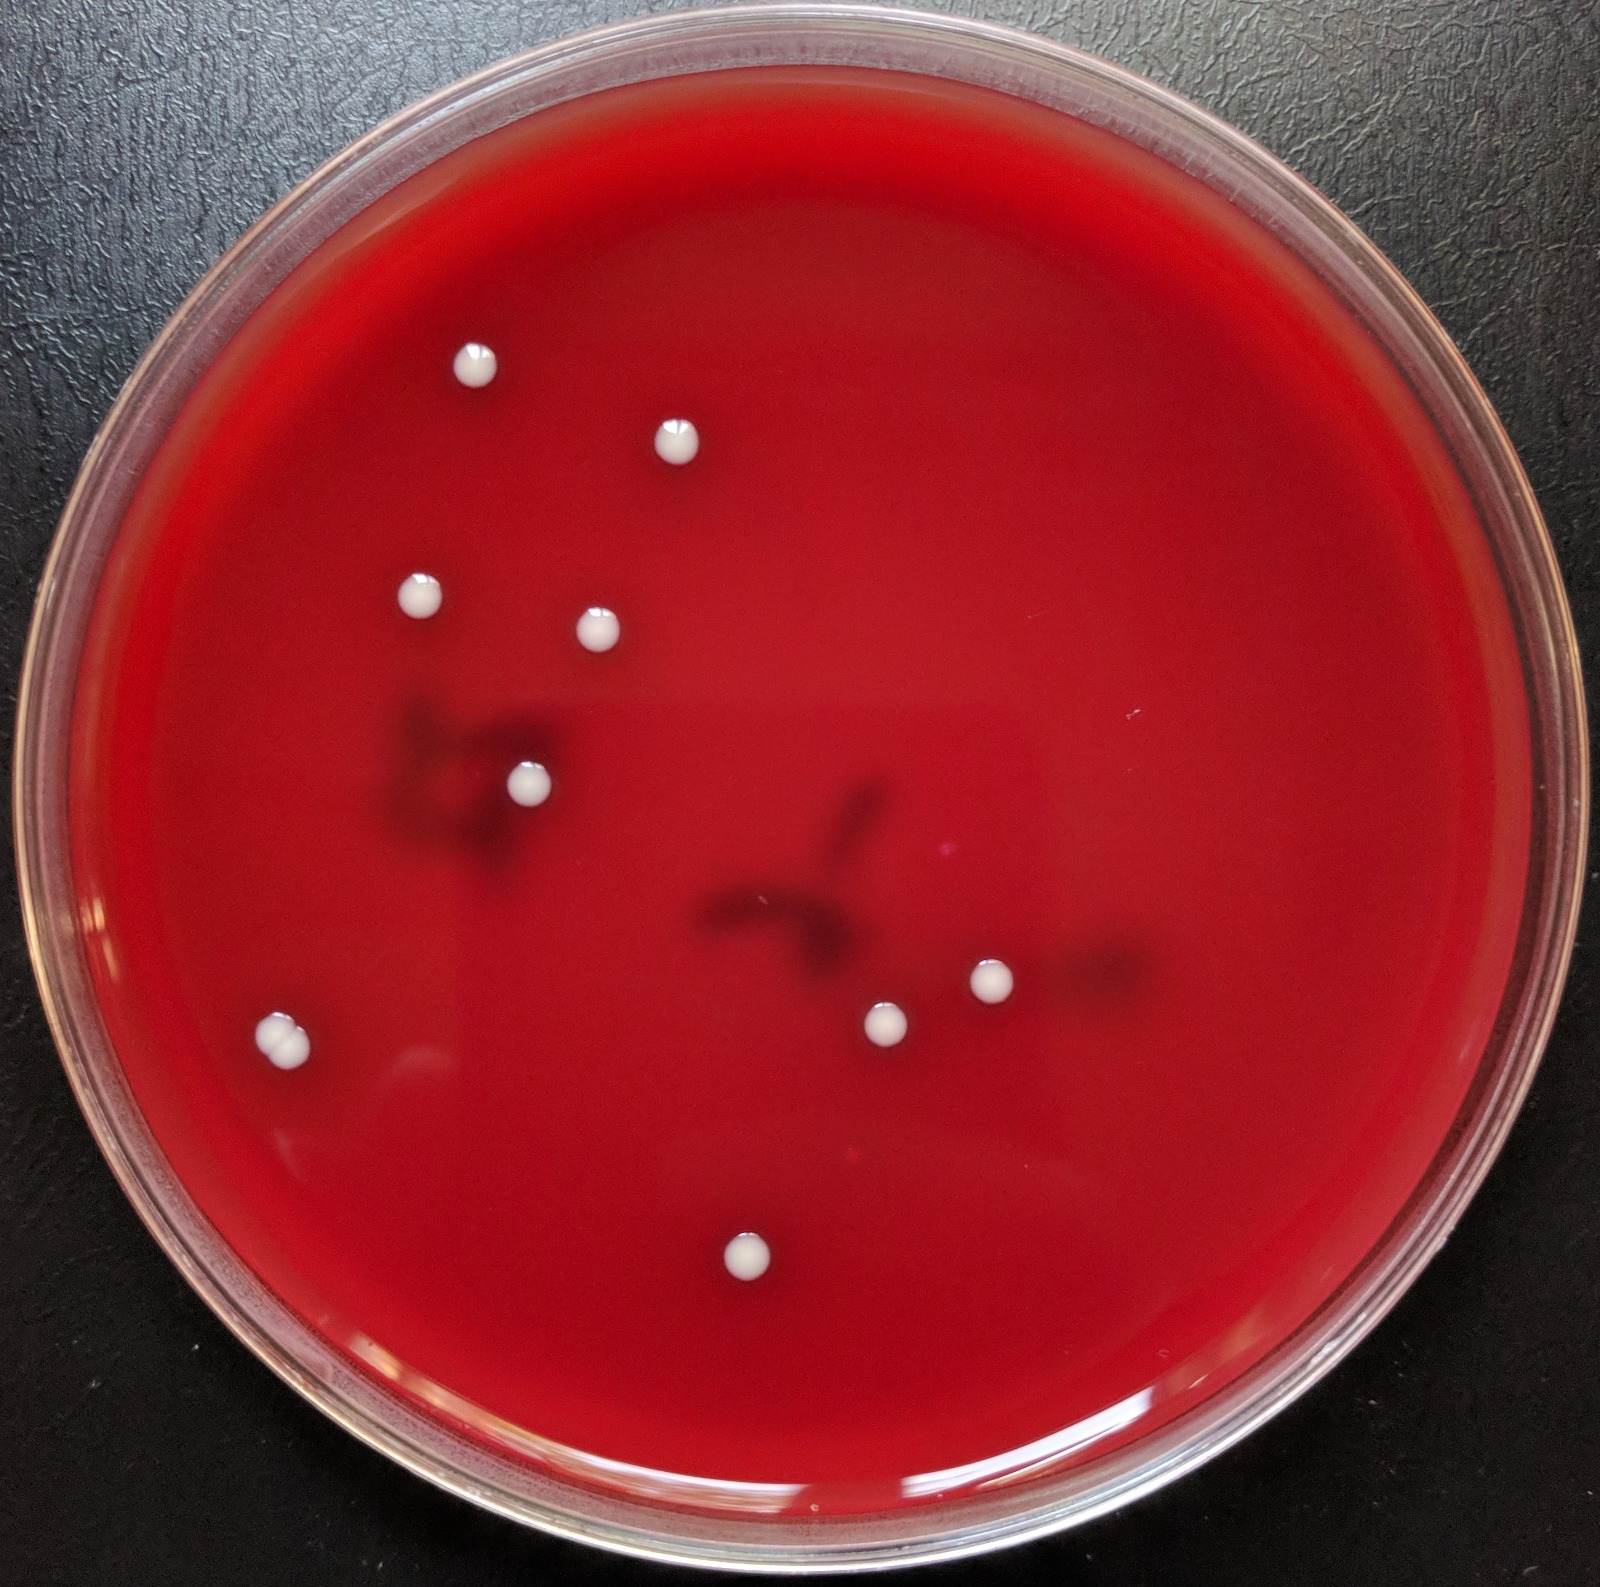

In [102]:
from IPython.display import Image

Image(filename)

In [103]:
from PIL import Image
import math
im=Image.open(filename)
im_lis=[]
base_name,extension=os.path.splitext(filename)
if im.size[0]>500 or im.size[1]>500:
  width_splits=math.ceil(im.size[0]/500)
  height_splits=math.ceil(im.size[1]/500)
  for i in range(width_splits):
    for j in range(height_splits):
      left=i*500
      upper=j*500
      right=min((i+1)*500,im.size[0])
      lower=min((j+1)*500,im.size[1])
      part_image=im.crop((left,upper,right,lower))
      #print(f"For iteration {i}_{j}:({left},{upper}),({right},{lower})")
      im_name=f"divided_im{i}_{j}{extension}"
      part_image.save(os.path.join(os.getcwd(),im_name))
      im_lis.append(os.path.join(os.getcwd(),im_name))
else:
  im_lis.append(filename)

In [104]:
from ultralytics import YOLO
model = YOLO(model_path)
results=[model.predict(
   source=img,
   conf=0.4,
    save=True
) for img in im_lis]



image 1/1 /content/divided_im0_0.jpeg: 640x640 (no detections), 1580.9ms
Speed: 5.5ms preprocess, 1580.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict13

image 1/1 /content/divided_im0_1.jpeg: 640x640 1 bacteria, 1547.9ms
Speed: 4.6ms preprocess, 1547.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict13

image 1/1 /content/divided_im0_2.jpeg: 640x640 2 bacterias, 1537.7ms
Speed: 4.7ms preprocess, 1537.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict13

image 1/1 /content/divided_im0_3.jpeg: 128x640 (no detections), 334.3ms
Speed: 1.3ms preprocess, 334.3ms inference, 0.5ms postprocess per image at shape (1, 3, 128, 640)
Results saved to runs/detect/predict13

image 1/1 /content/divided_im1_0.jpeg: 640x640 1 bacteria, 1522.0ms
Speed: 3.6ms preprocess, 1522.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 

In [105]:
results[1][0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'bacteria'}
orig_img: array([[[ 45,  42,  44],
        [ 64,  61,  63],
        [ 66,  63,  65],
        ...,
        [ 22,   9, 165],
        [ 25,  12, 168],
        [ 28,  15, 171]],

       [[ 60,  57,  59],
        [ 45,  42,  44],
        [ 34,  31,  33],
        ...,
        [ 25,  12, 168],
        [ 27,  14, 170],
        [ 28,  15, 171]],

       [[ 66,  63,  65],
        [ 48,  45,  47],
        [ 35,  32,  34],
        ...,
        [ 27,  14, 170],
        [ 28,  15, 171],
        [ 28,  15, 171]],

       ...,

       [[ 21,  24,  29],
        [ 15,  18,  23],
        [ 19,  22,  27],
        ...,
        [ 25,  11, 167],
        [ 28,  14, 170],
        [ 32,  18, 174]],

       [[ 24,  27,  32],
        [ 20,  23,  28],
        [ 24,  27,  32],
        ...,
        [ 26,  12, 168],
        [ 26,  12, 168],
        [ 30,  16, 17

In [106]:
tensor_boxes=[result[0].boxes.xyxy for result in results]
boxes=[]
for box in tensor_boxes:
  for sub_box in box:
    boxes.append(np.array(sub_box))
boxes

[array([     338.08,      5.1203,      496.79,      191.43], dtype=float32),
 array([     144.65,      0.2939,      437.93,      116.52], dtype=float32),
 array([     128.61,           0,      418.39,      86.366], dtype=float32),
 array([    0.43449,      175.25,      371.81,      499.91], dtype=float32),
 array([    0.18349,      21.266,      345.12,       238.2], dtype=float32),
 array([          0,      96.932,      309.22,      472.53], dtype=float32),
 array([     201.21,      188.56,      499.83,      499.94], dtype=float32),
 array([     78.042,      82.093,      415.95,      428.58], dtype=float32),
 array([     0.1754,      185.11,      293.48,         500], dtype=float32)]

In [107]:
print(f"Number of instances detected:{len(boxes)}")

Number of instances detected:9


In [108]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_boxes_on_image(boxes, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(1)
    ax.imshow(image)
    for box in boxes:
        x1, y1, x2, y2 = box
        width = x2 - x1
        height = y2 - y1
        rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
    plt.show()

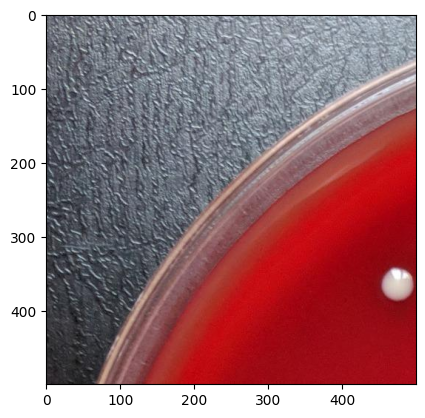

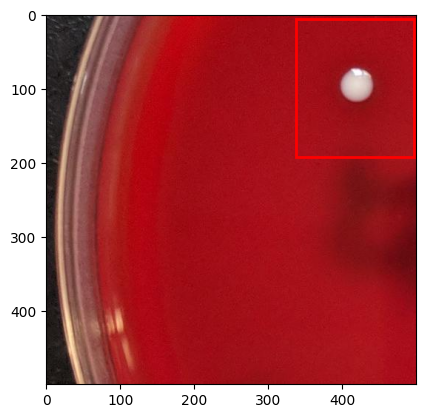

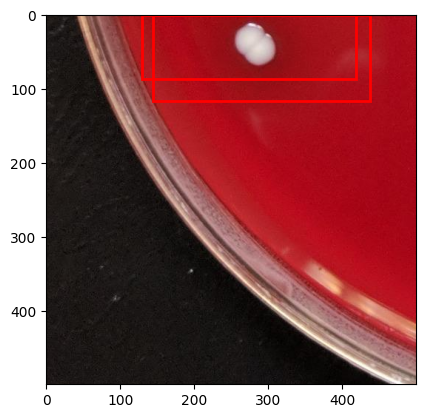

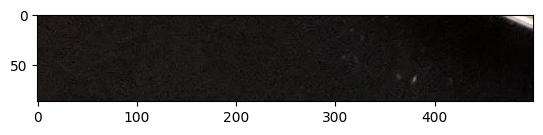

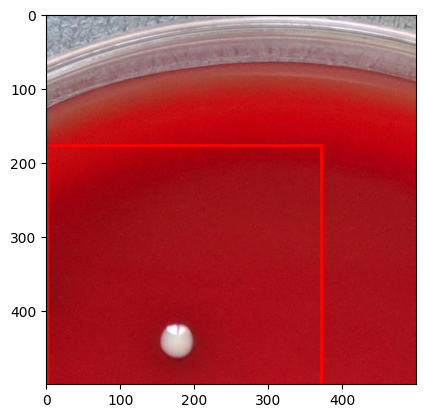

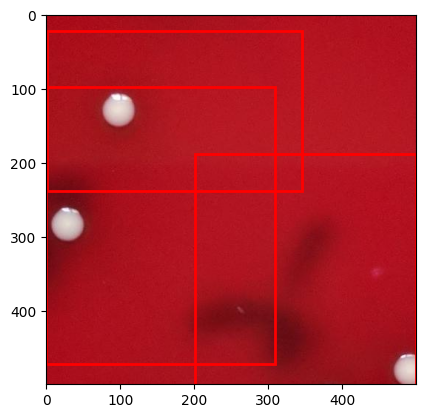

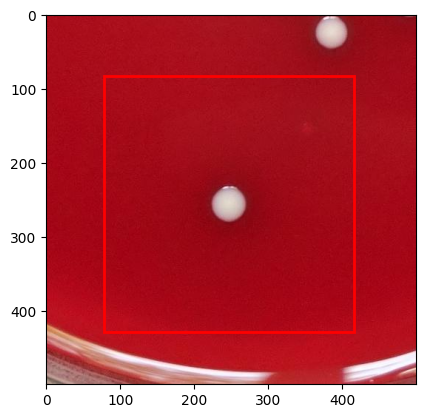

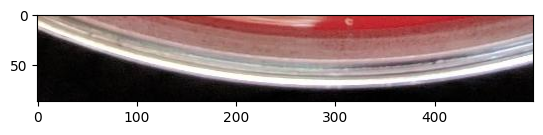

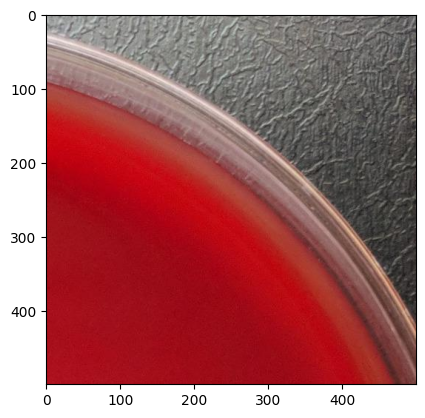

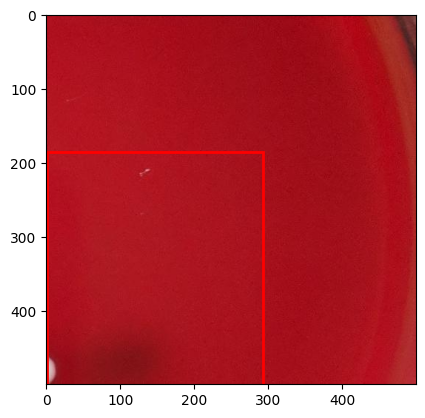

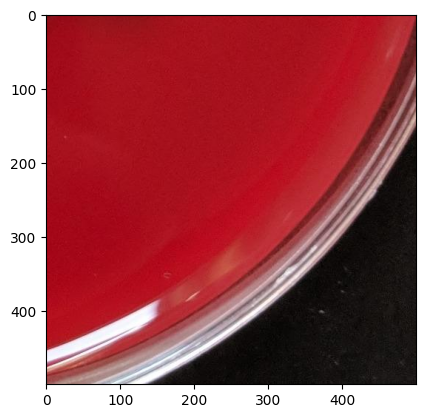

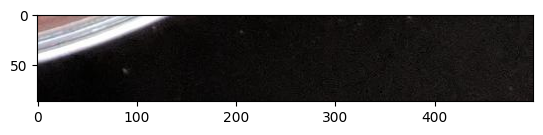

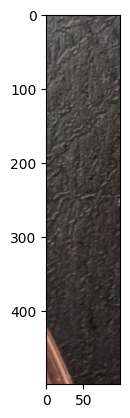

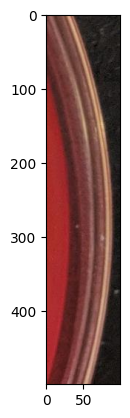

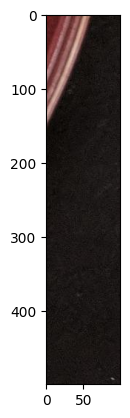

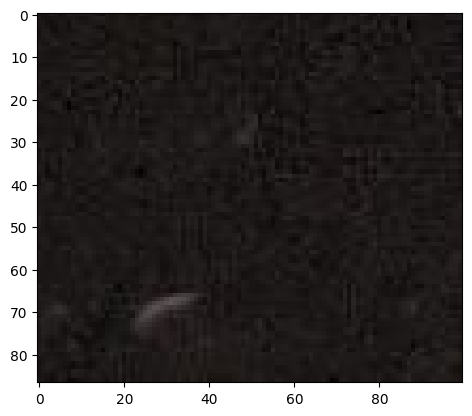

In [109]:
for result in results:
  draw_boxes_on_image(np.array(result[0].boxes.xyxy),result[0].orig_img)